In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.ticker as mticker
from sklearn.preprocessing import StandardScaler

iris = pd.read_csv('iris.csv').drop('Id', axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


X_train shape: (75, 4)
y_train shape: (75,)
X_test shape: (75, 4)
y_test shape: (75,)
Accuracies for each k: {1: 0.96, 2: 0.9066666666666666, 3: 0.96, 4: 0.92, 5: 0.96, 6: 0.9333333333333333, 7: 0.9733333333333334, 8: 0.9466666666666667, 9: 0.9866666666666667, 10: 0.9733333333333334, 11: 0.9733333333333334, 12: 0.96, 13: 0.96, 14: 0.9066666666666666, 15: 0.92, 16: 0.9066666666666666, 17: 0.9066666666666666, 18: 0.8933333333333333, 19: 0.8933333333333333, 20: 0.8933333333333333}


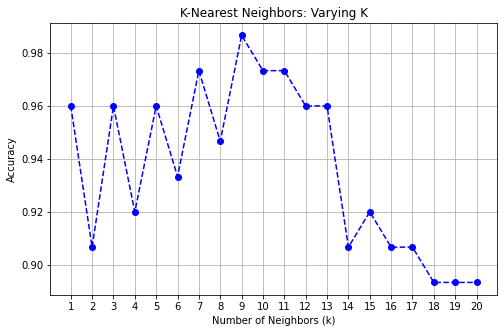

In [8]:
X = iris.drop('Species', axis=1).values
y = iris['Species'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Try different K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
import matplotlib.ticker as mticker

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('K-Nearest Neighbors: Varying K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.show()

print("Accuracies for each k:", dict(zip(k_values, accuracies)))

# Making it harder with just two features

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

def plot_clf_boundary(knn, X, y, title, name_col1, name_col2):
    fig, ax = plt.subplots()

    cmap = plt.cm.RdBu
    DecisionBoundaryDisplay.from_estimator(
        knn, X, response_method="predict", cmap=cmap, alpha=0.8, ax=ax
    )
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k", cmap=cmap)


    ax.set_xlabel(name_col1)
    ax.set_ylabel(name_col2)
    ax.set_title(title)
    plt.show()

X_train shape: (75, 2)
y_train shape: (75,)
X_test shape: (75, 2)
y_test shape: (75,)
Accuracies for each k: {1: 0.72, 2: 0.72, 3: 0.7866666666666666, 4: 0.7866666666666666, 5: 0.8133333333333334, 6: 0.76, 7: 0.7733333333333333, 8: 0.7733333333333333, 9: 0.76, 10: 0.7466666666666667, 11: 0.76, 12: 0.7466666666666667, 13: 0.76, 14: 0.7466666666666667, 15: 0.76, 16: 0.7466666666666667, 17: 0.76, 18: 0.76, 19: 0.76, 20: 0.76}


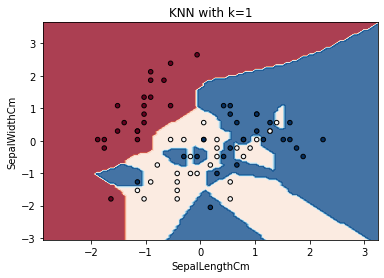

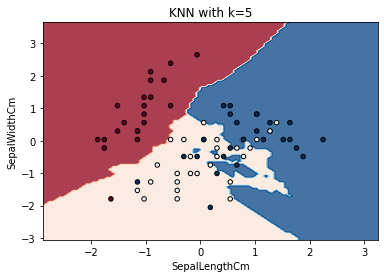

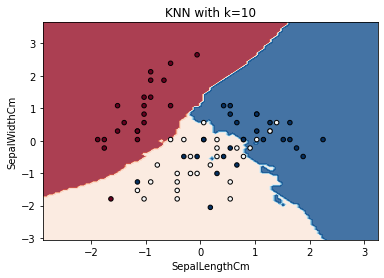

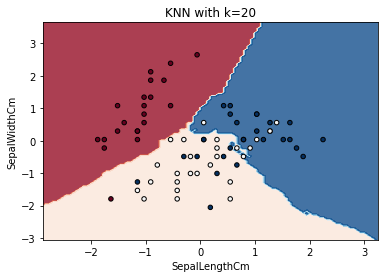

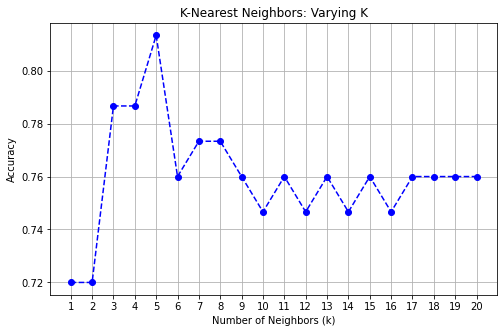

In [10]:
from os import name
X = iris.iloc[:, :2].values
y = iris['Species'].values
name_col1 = iris.columns[0]
name_col2 = iris.columns[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder

# Encode categorical target labels into numeric values
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Try different K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    if k in [1, 5, 10,20]:
        plot_clf_boundary(knn, X_train, y_train, f"KNN with k={k}", name_col1, name_col2)



plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('K-Nearest Neighbors: Varying K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(True)
plt.show()

print("Accuracies for each k:", dict(zip(k_values, accuracies)))